## Word Cloud
-  https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
-  https://www.datacamp.com/tutorial/wordcloud-python

In [1]:
#!pip install wordcloud
#!pip install wikipedia

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import wikipedia
from PIL import Image

In [3]:
#!pip install wordcloud wikipedia pillow
#stop words - is, as, the, which are not to be analysed

In [4]:
#stop words
stop_w = set(STOPWORDS)
#print(stop_w)

## Example 1
-  wordcloud from Text

In [5]:
text1 = 'The quick brown fox jumps over the lazy little dog  Dhiraj Dhiraj Python Python Python Akshay Akshay  Catherine Catherine Catherine Catherine'

In [10]:
print(text1)

The quick brown fox jumps over the lazy little dog  Dhiraj Dhiraj Python Python Python Akshay Akshay  Catherine Catherine Catherine Catherine


In [11]:
word_cloud = WordCloud().generate_from_text(text1)

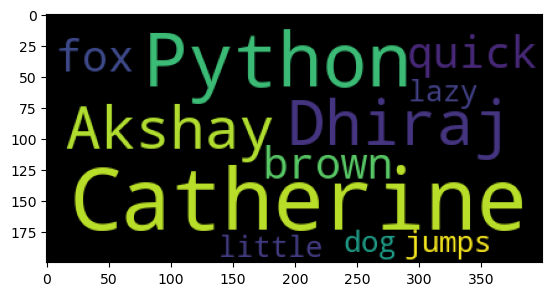

In [12]:
plt.imshow(word_cloud)

In [13]:
img = word_cloud.to_image()
img.show();

## Example 2
-  Load from text file in web
-  Contains list of words

In [24]:
import os
print(os.getcwd())

E:\analytics\projects\hrAnalytics\pyJp


In [26]:
textFile = '../data/misc/sampleWords.txt'
sampleText = open(textFile, "r").read()

In [28]:
#sampleText

In [29]:
#maskArray = npy.array(Image.open("cloud.png")) #mask = maskArray, 
cloudModel = WordCloud(background_color = "white", max_words = 20, stopwords = set(STOPWORDS))

In [30]:
sampleTextLower = sampleText.lower()
cloudModel.generate(sampleTextLower)

In [31]:
img = cloudModel.to_image()
img.show();

In [32]:
cloudModel.to_file("wordCloud1.png")
#save to file

## Example 3
-  wc = WordCloud( background_color="white", height=300, width=500,  include_numbers = True, min_word_length=6,  max_words = 50, margin = 8).generate(data)
-  minimum length of word
-  margin between words

In [34]:
cvFile = '../data/text/sampleCV.txt'
cvSample = open(cvFile , "r").read()

In [35]:
wcCVmodel = WordCloud(background_color="white", height=400, width=800,  min_word_length=3,  max_words = 20, margin = 8)
cvLower = cvSample.lower()
wcCVmodel.generate(cvLower)

In [36]:
img = wcCVmodel.to_image()
img.show();

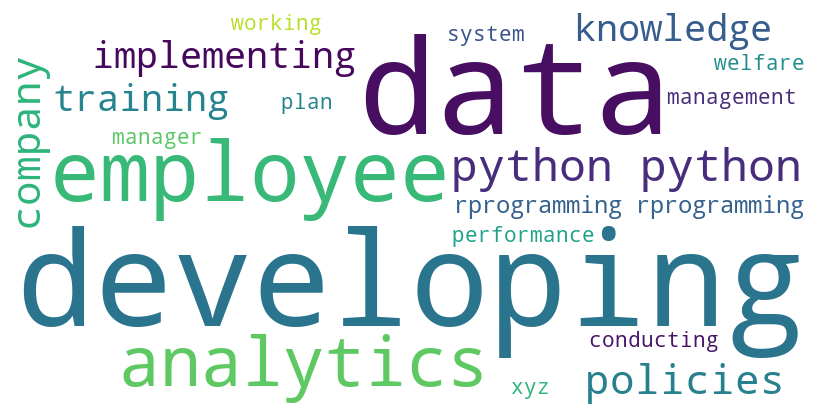

In [37]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wcCVmodel)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

# word Cloud from frequences

In [38]:
word = ['beautiful', 'lovely', 'efficient','play', 'growth','vulgar','ambition']
freq  = np.random.randint(low=30, high=100, size=7)
#wordFreq = pd.DataFrame({'word':word, 'freq':freq})
#word, freq
dict = {'word':word, 'freq':freq}
dict

{'word': ['beautiful',
  'lovely',
  'efficient',
  'play',
  'growth',
  'vulgar',
  'ambition'],
 'freq': array([64, 30, 50, 83, 53, 72, 92])}

In [39]:
words = pd.DataFrame(dict)
words

,word,freq
0,beautiful,64
1,lovely,30
2,efficient,50
3,play,83
4,growth,53
5,vulgar,72
6,ambition,92


In [40]:
tuples1 = [ tuple(x) for x in words.values]
tuples1
#words.to_dict()

[('beautiful', 64),
 ('lovely', 30),
 ('efficient', 50),
 ('play', 83),
 ('growth', 53),
 ('vulgar', 72),
 ('ambition', 92)]

In [41]:
dictWords = {}
for key, val in tuples1:    dictWords.setdefault(key, val)
print(dictWords)
##enumerate(tuples, start=0)

{'beautiful': 64, 'lovely': 30, 'efficient': 50, 'play': 83, 'growth': 53, 'vulgar': 72, 'ambition': 92}


In [42]:
wcF1 = WordCloud(scale=.8, prefer_horizontal=.5, font_step=2, min_font_size=10, max_font_size=100,  include_numbers = True,\
                background_color="white", stopwords=['vulgar'])
wcF1.generate_from_frequencies(frequencies=dictWords)
wcF1

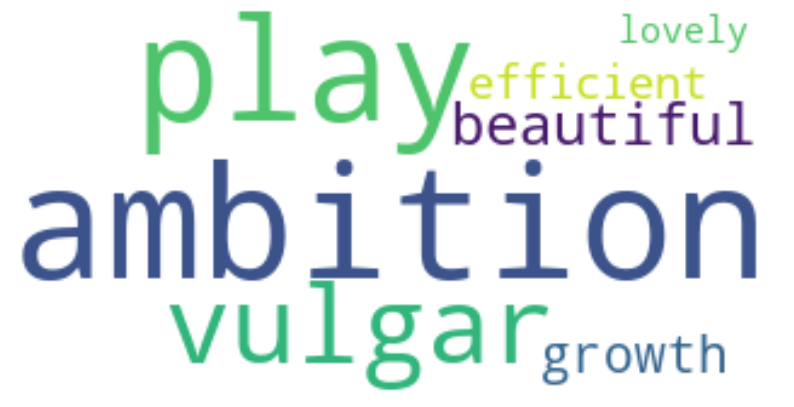

In [43]:
plt.figure(figsize=(10,7))
plt.imshow(wcF1, interpolation="bilinear")
plt.axis("off")
plt.show();

# Interactive


In [44]:
sheet_id = '1INLfAoJsnO6eWxUL1B23EcNIyVYY5GZnqXsJLiSGS6w'
sheet_name = 'pl2'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [45]:
dfPL = pd.read_csv(url)
dfPL= dfPL.set_index('language')
dfPL

,Y2021,Y2022,Y2023
language,,,
R,10,7,1
Python,6,1,6
Scala,8,7,6
C++,5,7,8
Java,8,2,10
Julia,1,6,5
SQL,8,10,9


In [46]:
Y2021 = dfPL['Y2021'].to_dict()
Y2022 = dfPL['Y2022'].to_dict()
Y2023 = dfPL['Y2023'].to_dict()
print(Y2021, Y2022, Y2023)

{'R': 10, 'Python': 6, 'Scala': 8, 'C++': 5, 'Java': 8, 'Julia': 1, 'SQL': 8} {'R': 7, 'Python': 1, 'Scala': 7, 'C++': 7, 'Java': 2, 'Julia': 6, 'SQL': 10} {'R': 1, 'Python': 6, 'Scala': 6, 'C++': 8, 'Java': 10, 'Julia': 5, 'SQL': 9}


In [47]:
import ipywidgets as widgets

In [48]:
dropDown = widgets.Dropdown(options=[('2021',Y2021), ('2022',Y2022), ('2023',Y2023)], value=Y2023, description='Year')

In [49]:
def update_WC(choice):
    wcIPY = WordCloud(colormap='tab10').generate_from_frequencies(choice)
    plt.figure(figsize=(8,8))
    plt.imshow(wcIPY)
    plt.axis('off')
    plt.show();

In [50]:
widgets.interact(update_WC, choice=dropDown)

interactive(children=(Dropdown(description='Year', index=2, options=(('2021', {'R': 10, 'Python': 6, 'Scala': …

<function __main__.update_WC(choice)>

## Word Cloud from text

In [51]:
pmText = " Today, all Indians in the country and also abroad are celebrating the festival of independence. On this day of sacred festival of independence, the prime servant of India extends greetings to all dear countrymen.I am present amidst you not as the Prime Minister, but as the Prime Servant. The freedom struggle was fought for so many years, so many generations laid down their lives, innumerable people sacrificed their lives and youth, spent their entire lives behind bars. Today, I pay my respect, greetings and homage to all those who laid their lives for the country's independence. I also pay my respects to the crores of citizens of this country on the pious occasion of India's independence, and recall all those martyrs who had laid down their lives in India's struggle for freedom. The day of independence is a festival when we take a solemn pledge of working for the welfare of mother India, and also for the welfare of the poor, oppressed, dalits, the exploited & the backward people of our country.  My dear countrymen, a national festival is an occasion to refine and rebuild the national character. This National festival inspires us to resolve ourselves to lead a life where our character gets refined further, to dedicate ourselves to the nation and our every activity is linked to the interest of the nation and only then this festival of freedom can be a festival of inspiration to take India to newer heights."

In [52]:
len(pmText)

1428

In [53]:
counts = WordCloud().process_text(pmText)
sorted(counts.items())[1:5]
#print(dict(sorted(counts.items(), key = lambda item: item[1], reverse=True)))

[('Indians', 1), ('Minister', 1), ('Prime', 3), ('Today', 2)]

In [54]:
wc5 = WordCloud(colormap='coolwarm').generate(pmText)
wc5

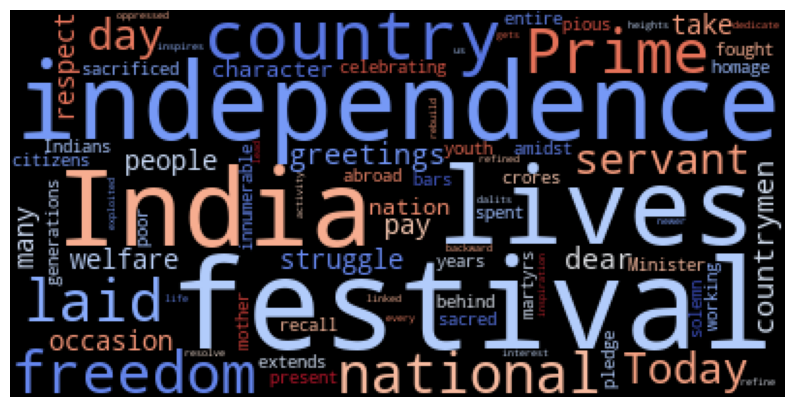

In [55]:
plt.figure(figsize=(10,7))
plt.imshow(wc5)
plt.axis('off')
plt.show();
#save to file : #wc5.to_file('./images/pmSpeech.png')

In [56]:
#end here

# Links
-  Example 
    -  https://www.kaggle.com/datasets/datasnaek/youtube
    -  https://blog.devgenius.io/text-data-analysis-youtube-sentiment-wordcloud-and-emojis-analysis-c65657bfa2b8
    -  https://github.com/shubhamringole/Text-Data-Analysis-YouTube-Sentiment-WordCloud-and-Emojis-Analysis